In [5]:
import pandas as pd
import numpy as np
import seaborn as sns


Read the the train file

In [6]:
trainFile = pd.read_csv('train.csv')

'''Display the first n rows data; by default n = 5'''
trainFile.head(n=10)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Check for any null values, drop if any.

In [7]:
totalNullValues = trainFile.isnull().sum()
totalNullValues

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Read the testFile 

In [8]:
testFile = pd.read_csv('test.csv')
testFile.head(n=10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


Check for any null values in testFile


In [9]:
totalTestFileNullValues = testFile.isnull().sum()
totalTestFileNullValues


id              0
comment_text    0
dtype: int64

In [10]:
def getSpecificCommentsType(type):
   return trainFile.loc[trainFile[type] > 0]['comment_text']

In [11]:
import matplotlib.pyplot as plt


Show word cloud.

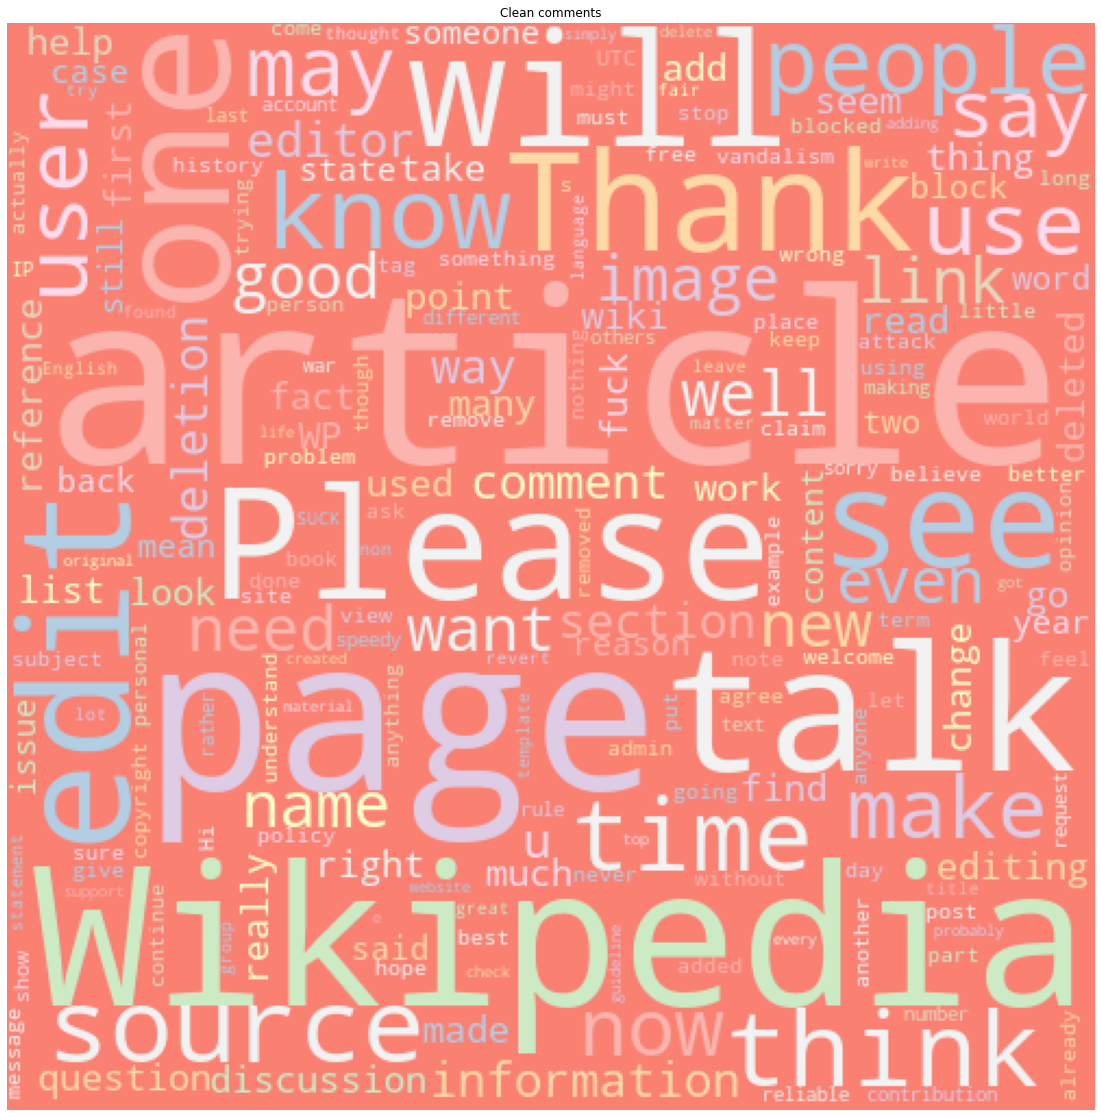

In [12]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.title('Clean comments')
    plt.imshow(wordcloud) 
    plt.axis("off")
    
    plt.savefig("wordcloud"+".png", bbox_inches='tight')

text = trainFile['comment_text']
text = (" ").join(text)
text = text.replace('\n', '')
wordcloud = WordCloud(width= 500, height = 500, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)



In [13]:
toxic_comments =  getSpecificCommentsType('toxic')

print(toxic_comments)


6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12        Hey... what is it..\n@ | talk .\nWhat is it......
16        Bye! \n\nDon't look, come or think of comming ...
42        You are gay or antisemmitian? \n\nArchangel WH...
43                 FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
                                ...                        
159494    "\n\n our previous conversation \n\nyou fuckin...
159514                    YOU ARE A MISCHIEVIOUS PUBIC HAIR
159541    Your absurd edits \n\nYour absurd edits on gre...
159546    "\n\nHey listen don't you ever!!!! Delete my e...
159554    and i'm going to keep posting the stuff u dele...
Name: comment_text, Length: 15294, dtype: object


In [14]:
import tensorflow as tf
from keras_preprocessing.text import Tokenizer

In [15]:
### Word tokenization example

text = 'Contrary to popular belief, Lorem Ipsum is not simply random text. It has roots in a piece of classical Latin literature from 45 BC, making it over 2000 years old.'
maxFeatures = 20000
tokenizer = Tokenizer(num_words=maxFeatures,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=" ",
                      char_level=False)
                      
tokenizer.fit_on_texts(text)

print(tokenizer.word_counts)
print(tokenizer.document_count)


OrderedDict([('c', 5), ('o', 12), ('n', 6), ('t', 11), ('r', 11), ('a', 11), ('y', 3), ('p', 5), ('u', 3), ('l', 9), ('b', 2), ('e', 10), ('i', 12), ('f', 3), ('m', 6), ('s', 8), ('d', 2), ('x', 1), ('h', 1), ('4', 1), ('5', 1), ('k', 1), ('g', 1), ('v', 1), ('2', 1), ('0', 3)])
163


In [16]:
### Word tokenization example

text = 'This is a tokenization example with characters @ ! ??'
tokenizer = Tokenizer(
                      num_words=20000,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=" ",
                      char_level=False)
                      
tokenizer.fit_on_texts(text)

print('Word document ', tokenizer.word_counts)
print()
print('Total chars including space', tokenizer.document_count)


Word document  OrderedDict([('t', 5), ('h', 3), ('i', 5), ('s', 3), ('a', 5), ('o', 2), ('k', 1), ('e', 4), ('n', 2), ('z', 1), ('x', 1), ('m', 1), ('p', 1), ('l', 1), ('w', 1), ('c', 2), ('r', 2)])

Total chars including space 53


### Separate the labels and features.

In [17]:
x_train = trainFile["comment_text"]

y_train = trainFile[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

x_test = testFile["comment_text"]


In [18]:
y = y_train.values
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

### Tokenize the training dataset

In [19]:
x_train.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [20]:
tokenizer.fit_on_texts(list(x_train))
tokenizedTrain = tokenizer.texts_to_sequences(x_train)
tokenizedTest = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index


### Let's see what is the length of most comments.

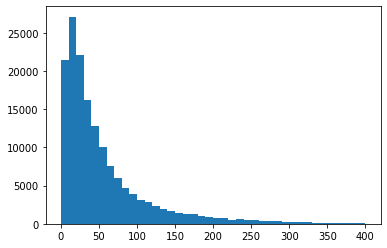

In [21]:
totalNumWords = [len(one_comment) for one_comment in tokenizedTrain]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

As it is quite evident from the histogram that the length of most comments is around 50 or less.
Taking lenght of 200 should be good

In [22]:
max_len = 200

### Add padding

In [24]:
from keras_preprocessing.sequence import pad_sequences

# Pad sequences
processed_X_train = pad_sequences(tokenizedTrain, maxlen=max_len, padding='post', truncating='post')
processed_X_test = pad_sequences(tokenizedTest, maxlen=max_len, padding='post', truncating='post')

Censure the words for NSFW


In [ ]:
# Replace middle chars with
def replace(text,index=0,replacement='*'):
    chars = list(text)
    first = chars[0]
    last =  chars[-1]
    replacedString = ''
    
    for index in range(len(chars)):
        if index != 0 and index != len(chars) - 1:
            replacedString += '*'
    return first+replacedString+last

In [ ]:
def getTotalWordsOfSpecificType(tokenizer):
    wordCount = [(key, value) for key, value in zip(tokenizer.word_counts.keys(), 
                                       tokenizer.word_counts.values())]
    wordCount.sort(key = lambda tup: tup[1], reverse=True)
    
    count = [tup for tup in wordCount if tup[0] not in STOPWORDS]
    return count

def wordPlot(wordCount, totalWords, title, shouldCensure = True):
    plt.figure(title, figsize=(12, 5))
    plt.suptitle(title, fontsize=15)
    x = [replace(tup[0]) if shouldCensure else tup[0] for tup in wordCount[0:totalWords]]
    y = [tup[1] for tup in wordCount[0:totalWords]]
    sns.barplot(x= x, 
                y = y)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12, rotation=35, ha='right')
    plt.show()
    plt.savefig(title+".png", bbox_inches='tight')


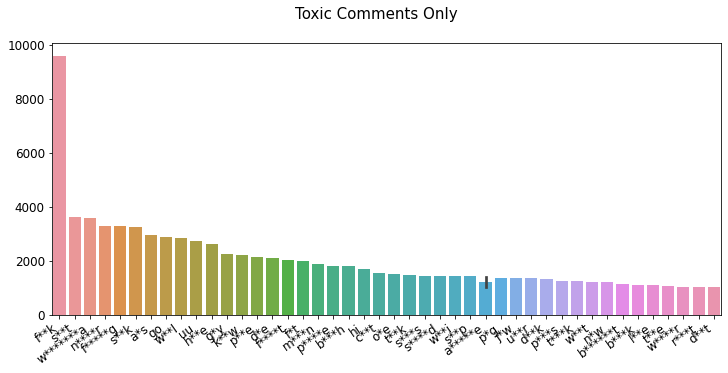

<Figure size 432x288 with 0 Axes>

In [ ]:
'''Toxic comments visualization'''

toxic_tokenizer = Tokenizer(lower=True)
toxic_tokenizer.fit_on_texts(toxic_comments)
# print(toxic_comments)
wordPlot(getTotalWordsOfSpecificType(toxic_tokenizer), 45 , 'Toxic Comments Only')



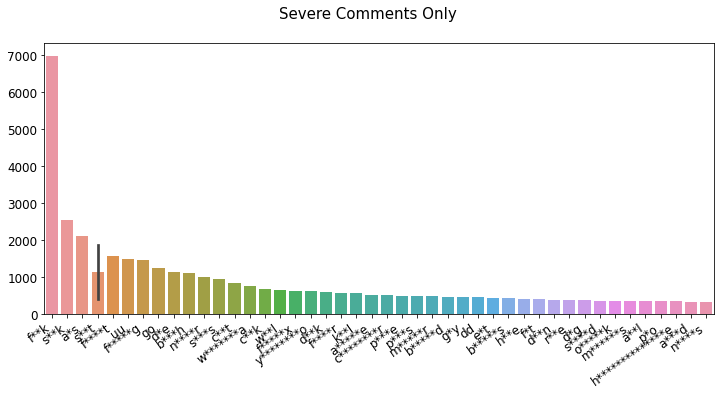

<Figure size 432x288 with 0 Axes>

In [ ]:
toxic_tokenizer = Tokenizer(lower=True)

severe_toxic_comments =  getSpecificCommentsType('severe_toxic')
toxic_tokenizer.fit_on_texts(severe_toxic_comments)
wordPlot(getTotalWordsOfSpecificType(toxic_tokenizer), 45 , 'Severe Comments Only')

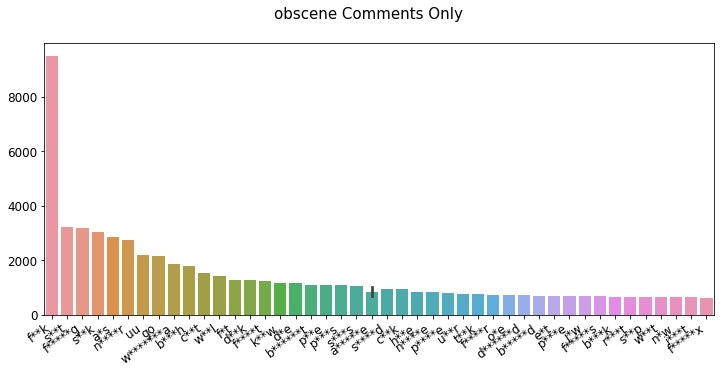

<Figure size 432x288 with 0 Axes>

In [ ]:
toxic_tokenizer = Tokenizer(lower=True)

severe_toxic_comments =  getSpecificCommentsType('obscene')
toxic_tokenizer.fit_on_texts(severe_toxic_comments)
wordPlot(getTotalWordsOfSpecificType(toxic_tokenizer), 45 , 'obscene Comments Only')

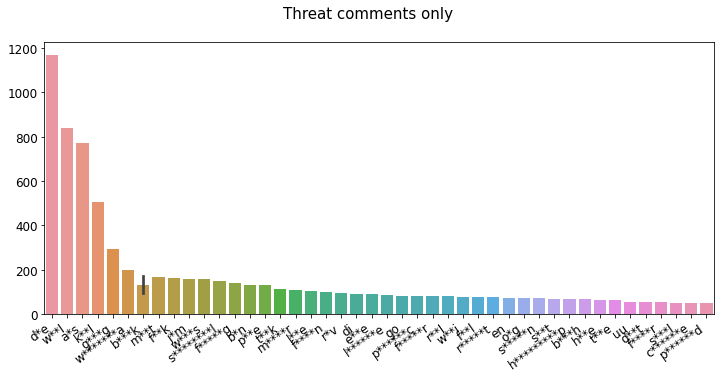

<Figure size 432x288 with 0 Axes>

In [ ]:
toxic_tokenizer = Tokenizer(lower=True)

severe_toxic_comments =  getSpecificCommentsType('threat')
toxic_tokenizer.fit_on_texts(severe_toxic_comments)
wordPlot(getTotalWordsOfSpecificType(toxic_tokenizer), 45 , 'Threat comments only')

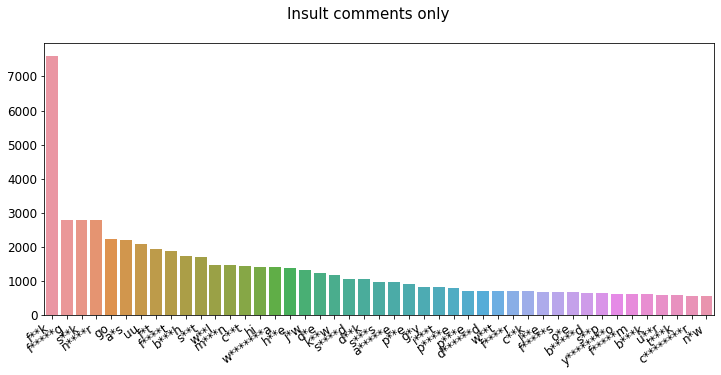

<Figure size 432x288 with 0 Axes>

In [ ]:
toxic_tokenizer = Tokenizer(lower=True)

severe_toxic_comments =  getSpecificCommentsType('insult')
toxic_tokenizer.fit_on_texts(severe_toxic_comments)
wordPlot(getTotalWordsOfSpecificType(toxic_tokenizer), 45 , 'Insult comments only')

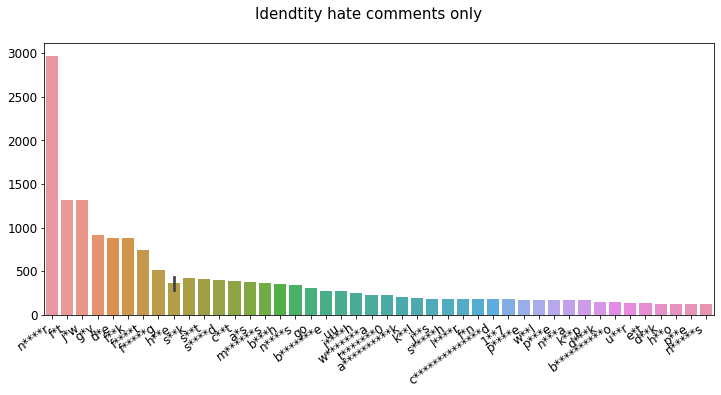

<Figure size 432x288 with 0 Axes>

In [ ]:
toxic_tokenizer = Tokenizer(lower=True)

severe_toxic_comments =  getSpecificCommentsType('identity_hate')
toxic_tokenizer.fit_on_texts(severe_toxic_comments)
wordPlot(getTotalWordsOfSpecificType(toxic_tokenizer), 45 , 'Idendtity hate comments only')


 Clean comments 


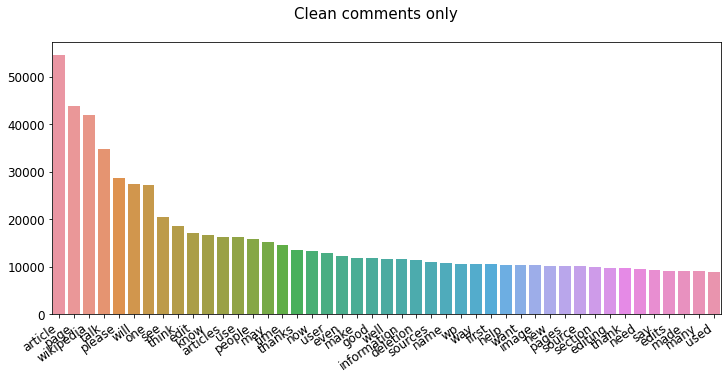

<Figure size 432x288 with 0 Axes>

In [ ]:
toxic_tokenizer = Tokenizer(lower=True)

clean_comments =  trainFile.loc[(trainFile['toxic'] == 0) & (trainFile['severe_toxic'] == 0) & (trainFile['obscene'] == 0)  &
(trainFile['threat'] == 0) & (trainFile['insult'] == 0) & (trainFile['identity_hate'] == 0)]['comment_text']
toxic_tokenizer.fit_on_texts(clean_comments)
wordPlot(getTotalWordsOfSpecificType(toxic_tokenizer), 45 , 'Clean comments only', shouldCensure=False)

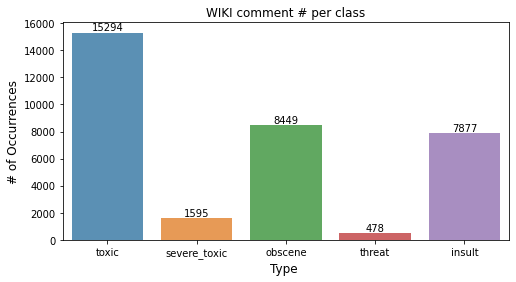

ratio of wiki toxic comment  0.21114738893658622


In [ ]:
x=trainFile.iloc[:,2:7].sum()

#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x= x.index, y=x.values, alpha=0.8)
plt.title("WIKI comment # per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()
print('ratio of wiki toxic comment ',x.sum()/len(trainFile))


## Proportion of comments type

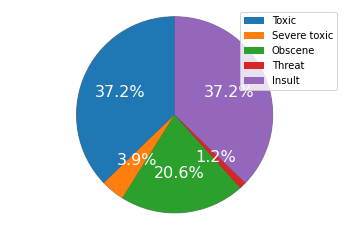

In [ ]:
labels = ['Toxic', 'Severe toxic', 'Obscene', 'Threat', 'Insult']
toxicProportion = (x.values[0] / x.sum()) * 100
stoxicProportion = (x.values[1] / x.sum()) * 100
obsceneProportion = (x.values[2] / x.sum()) * 100
threatProportion = (x.values[3] / x.sum()) * 100
insultProportion = (x.values[0] / x.sum()) * 100

sizes = [toxicProportion, stoxicProportion, obsceneProportion, threatProportion, insultProportion]

explode = [0, 0, 0, 0.2, 0]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'color':"w", 'fontsize': 16}, radius=2000,)
ax1.axis('equal')
plt.legend()
plt.savefig('pie_chart.jpg', dpi= 100)
plt.show()

### Creating Model

In [ ]:
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout
inputLayer = Input(shape=(max_len, ))


### Embedding

In [ ]:
embeddingSize = 128
x = Embedding(maxFeatures, embeddingSize)(inputLayer)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inputLayer, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model = Model(inputs=inputLayer, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 2
model.fit(processed_X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 547s 121ms/step - loss: 0.0631 - accuracy: 0.9641 - val_loss: 0.0500 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 467s 104ms/step - loss: 0.0449 - accuracy: 0.9889 - val_loss: 0.0471 - val_accuracy: 0.9934


In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                3050      
                                                           

## Save the model


In [ ]:
model.save('model.h5')


In [ ]:
def predictToxicComment(string):
    new_string = [string]
    new_string = tokenizer.texts_to_sequences(new_string)
    new_string = pad_sequences(new_string, maxlen=max_len, padding='post', truncating='post')
    # model = tf.keras.models.load_model('model.h5')
    prediction = model.predict(new_string)
    
    # print("Toxicity levels for '{}':".format(string))
    print('Toxic:         {:.0%}'.format(prediction[0][0]))
    print('Severe Toxic:  {:.0%}'.format(prediction[0][1]))
    print('Obscene:       {:.0%}'.format(prediction[0][2]))
    print('Threat:        {:.0%}'.format(prediction[0][3]))
    print('Insult:        {:.0%}'.format(prediction[0][4]))
    print('Identity Hate: {:.0%}'.format(prediction[0][5]))
    print()
    
    return

predictToxicComment('I killed him')



[[0.3741138  0.00684109 0.07119831 0.02619165 0.11480412 0.02990019]]
Toxic:         37%
Severe Toxic:  1%
Obscene:       7%
Threat:        3%
Insult:        11%
Identity Hate: 3%



In [ ]:
predictToxicComment('I loved reading this article. So helpful. Thank you!')

[[3.4374893e-03 1.2308112e-05 6.8145990e-04 3.2139993e-05 4.4119358e-04
  5.5046985e-05]]
Toxicity levels for 'I loved reading this article. So helpful. Thank you!':
Toxic:         0%
Severe Toxic:  0%
Obscene:       0%
Threat:        0%
Insult:        0%
Identity Hate: 0%



In [ ]:
predictToxicComment('This article is biased. Get it right u b***h')


[[0.99516976 0.12360314 0.94447154 0.01699099 0.7801163  0.0717032 ]]
Toxic:         100%
Severe Toxic:  12%
Obscene:       94%
Threat:        2%
Insult:        78%
Identity Hate: 7%

